In [2]:
import pandas as pd

df = pd.read_csv("201910-baywheels-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.829705,-122.287610,385,Woolsey St at Sacramento St,37.850578,-122.278175,12222,Customer,No
1,72610,2019-10-31 13:04:11.1950,2019-11-01 09:14:21.8050,376,Illinois St at 20th St,37.760458,-122.387540,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,282,Customer,No
2,56636,2019-10-31 17:17:37.6480,2019-11-01 09:01:33.7720,453,Brannan St at 4th St,37.777934,-122.396973,453,Brannan St at 4th St,37.777934,-122.396973,10940,Customer,No
3,42250,2019-10-31 20:11:11.1270,2019-11-01 07:55:21.7440,182,19th Street BART Station,37.809369,-122.267951,163,Lake Merritt BART Station,37.797320,-122.265320,12623,Subscriber,No
4,40076,2019-10-31 18:48:32.1410,2019-11-01 05:56:28.4670,237,Fruitvale BART Station,37.775232,-122.224498,237,Fruitvale BART Station,37.775232,-122.224498,2601,Customer,No


In [3]:
# df = df.sample(n=100)
# df.head()

In [4]:
# start_time -> year, month, date, time
from collections import defaultdict

times = defaultdict(list)
for entry in df["start_time"]:
    parts = entry.split(" ")
    date = parts[0].split("-")
    times["year"].append(date[0])
    times["month"].append(date[1])
    times["day"].append(date[2])
    times["time_of_day"].append(parts[1][:2])
times

defaultdict(list,
            {'year': ['2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
              '2019',
      

In [5]:
times_df = pd.DataFrame(times)
times_df.head()

,year,month,day,time_of_day
0,2019,10,31,16
1,2019,10,31,13
2,2019,10,31,17
3,2019,10,31,20
4,2019,10,31,18


In [6]:
df = df.reset_index()
df = df.join(times_df)

In [7]:
df.head()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,year,month,day,time_of_day
0,0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.829705,-122.287610,385,Woolsey St at Sacramento St,37.850578,-122.278175,12222,Customer,No,2019,10,31,16
1,1,72610,2019-10-31 13:04:11.1950,2019-11-01 09:14:21.8050,376,Illinois St at 20th St,37.760458,-122.387540,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,282,Customer,No,2019,10,31,13
2,2,56636,2019-10-31 17:17:37.6480,2019-11-01 09:01:33.7720,453,Brannan St at 4th St,37.777934,-122.396973,453,Brannan St at 4th St,37.777934,-122.396973,10940,Customer,No,2019,10,31,17
3,3,42250,2019-10-31 20:11:11.1270,2019-11-01 07:55:21.7440,182,19th Street BART Station,37.809369,-122.267951,163,Lake Merritt BART Station,37.797320,-122.265320,12623,Subscriber,No,2019,10,31,20
4,4,40076,2019-10-31 18:48:32.1410,2019-11-01 05:56:28.4670,237,Fruitvale BART Station,37.775232,-122.224498,237,Fruitvale BART Station,37.775232,-122.224498,2601,Customer,No,2019,10,31,18


In [8]:
df.shape

(239895, 19)

In [9]:
usage = df.groupby("time_of_day")["index"].count()
usage = usage / usage.max()
usage

time_of_day
00    0.047547
01    0.027882
02    0.017602
03    0.007151
04    0.008285
05    0.042768
06    0.185031
07    0.478152
08    0.985045
09    0.758311
10    0.367071
11    0.337367
12    0.348506
13    0.343074
14    0.331798
15    0.380032
16    0.626225
17    1.000000
18    0.790009
19    0.448035
20    0.276653
21    0.206003
22    0.149379
23    0.085571
Name: index, dtype: float64

In [10]:
usage.index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='time_of_day')

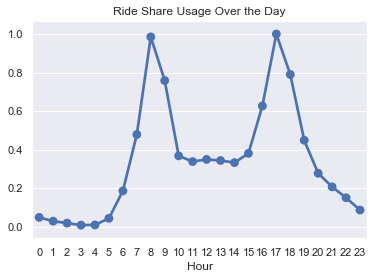

In [11]:
import seaborn as sns
sns.set()
fig = sns.pointplot([int(x) for x in usage.index], usage)
fig.set_title("Ride Share Usage Over the Day")
fig.set_ylabel("")
fig.set_xlabel("Hour")
output = fig.get_figure()
output.savefig("day_trend.png")

In [53]:
corr = df.corr()

In [55]:
corr

,index,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
index,1.000000,0.004046,-0.004503,0.006889,0.003992,-0.004952,0.005366,-0.001991,-0.017827
duration_sec,0.004046,1.000000,0.023413,0.013808,-0.029939,0.045139,-0.108370,0.116919,0.004579
start_station_id,-0.004503,0.023413,1.000000,-0.189407,0.315154,0.200715,-0.066937,0.045322,-0.056117
start_station_latitude,0.006889,0.013808,-0.189407,1.000000,-0.732708,-0.184212,0.367842,-0.104726,-0.065517
start_station_longitude,0.003992,-0.029939,0.315154,-0.732708,1.000000,0.350771,-0.273389,0.140317,-0.079954
end_station_id,-0.004952,0.045139,0.200715,-0.184212,0.350771,1.000000,-0.088511,0.063085,-0.056811
end_station_latitude,0.005366,-0.108370,-0.066937,0.367842,-0.273389,-0.088511,1.000000,-0.958163,-0.026124
end_station_longitude,-0.001991,0.116919,0.045322,-0.104726,0.140317,0.063085,-0.958163,1.000000,-0.008953
bike_id,-0.017827,0.004579,-0.056117,-0.065517,-0.079954,-0.056811,-0.026124,-0.008953,1.000000


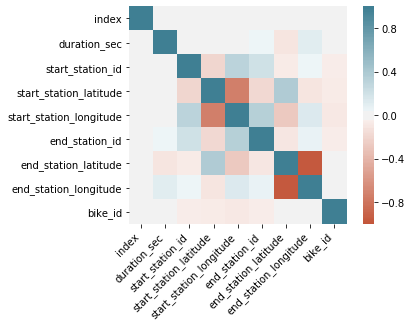

In [54]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);